In [1]:
%autosave 0

Autosave disabled


# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"


Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())
#print data['Fresh'].value_counts().idxmax()
#print data['Milk'].value_counts().idxmax()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [160, 230, 358]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)
#what's the mean purchase for each category?
print data.mean()

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1725,3651,12822,824,4424,2157
1,11072,5989,5615,8321,955,2137
2,759,18664,1660,6114,536,4100


Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

We are looking at customers with index 160, 230 and 358.

- **0** This customer seems to have the highest spend for Grocery items in absolute terms, compared to other categories. In addition, his spends on Groceries, Detergents_paper and Delicatessen are larger than average. This is highly likely to be a **middleman supplier** to restaurants, superstores and mom-n-pop stores.

- **1** The highest absolute spend is in Fresh category, and it is just little under the category average. Milk spend is average, and Frozen and Delicatessen spends are _much_ higher than average. This seems like either a **fast-food chain, a set of food-trucks, or a niche eatery**. 

- **2** The spends of this customer are effectively nil for Fresh, Grocery and Cleaners categories, and much higher than average for Milk, Frozen abd Delicates. This seems likely to be some sort of a **coffee shop**.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# try with one feature at a time, for all features...
dropped_f = data.keys()

#[u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper', u'Delicatessen']

def chk_features(feature_drop):
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data =  data.drop([feature_drop], axis = 1, inplace = False)
    lbls_chk = data[feature_drop]

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, lbls_chk, test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = regressor = DecisionTreeRegressor(random_state=42)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test,y_test)
    print "{:16s}\t{:4f}".format(feature_drop, score)
    
for drop in dropped_f:
    chk_features(drop)

Fresh           	-0.385750
Milk            	0.156275
Grocery         	0.681884
Frozen          	-0.210136
Detergents_Paper	0.271667
Delicatessen    	-2.254712


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

Picking one feature to predict seemed a truly random action. While one cna have __some *little*__ intuition about which item-groups can be exclusive (say high on milk and frozen, would typically be low on grocery, or Detergents), there does not seem to be any reason to believe that there could be a positive correlation amongst the features. 

To test this out, I thus applied the same logic to **all** the features, to check the correlation. Note that I am able to do this since the number of features is small. For a very large set of features, this strategy will not even take off. Anyways, onwards to interpret the results.

3 features have negative ```R^2```, thus implying these **definitely do not fit** the model.
Fresh, Frozen and Delicatessen data _must be a part of the dataset_.

2 of the remaining have low ```R^2``` values thus implying a **poor fit**. Detergents and Milk data, thus ought to be a part of the dataset.

The feature that is interesting to examine is the Grocery, with an ```R^2``` of about 0.68. This does denote a strong correlation, but it also comes with a very simple explanation: _Everybody buys Groceries_. One possible reason for this is that the definition of groceries is quite wide.
Thus we do not attach much significance to this ```R^2```.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

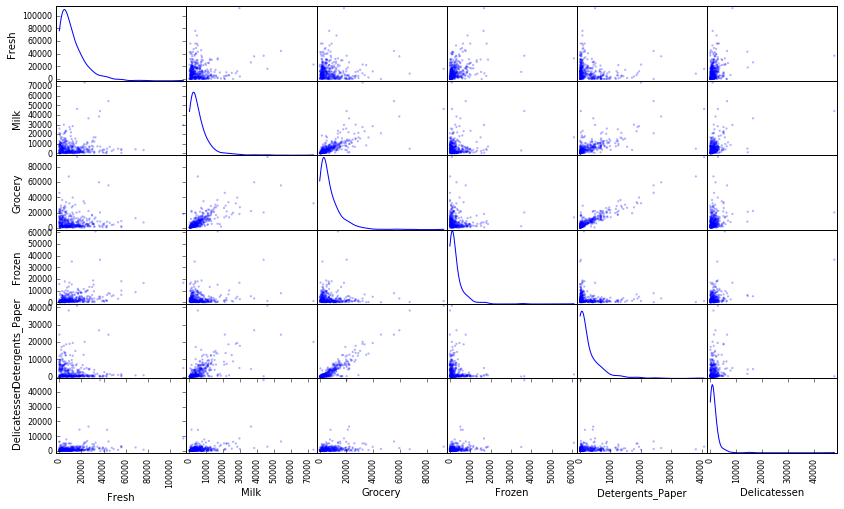

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [7]:
import seaborn as sns
#sns.distplot(data[['Fresh']], norm_hist=True) #and for other features

#sns.jointplot('Fresh', 'Delicatessen', data, size=6, kind="reg");

#sns.jointplot('Fresh', 'Grocery', data, size=7, color='g', kind="reg")

#sns.jointplot('Detergents_Paper', 'Grocery', data, size=7, color='y', kind="reg")
#percentile = data.rank(pct=True)
#print percentile.shape, "\n", percentile.head(5), "\n\n", percentile.iloc[indices], "\n\n"
print "Means:\n",data.mean(),"Medians:\n",data.median(), "\n\nMode Values:\n", data.mode()


Means:
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64 Medians:
Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64 

Mode Values:
      Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0       3.0   577.0    683.0   133.0                 3           3.0
1     514.0   659.0   1493.0   364.0                20         834.0
2    3366.0   829.0   1563.0   402.0                56           NaN
3    7149.0   899.0   1664.0   425.0                69           NaN
4    8040.0   944.0   2062.0   744.0                70           NaN
5    9670.0  1012.0   2405.0   779.0                93           NaN
6   18044.0  1032.0   2406.0   824.0                96           NaN
7       NaN  1115.0   3600.

In [8]:

#pd.plotting.scatter_matrix(data[['Grocery','Detergents_Paper']], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

#sns.jointplot(x='Grocery', y='Detergents_Paper' , data=data)
#sns.jointplot(x='Grocery', y='Milk' , data=data)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


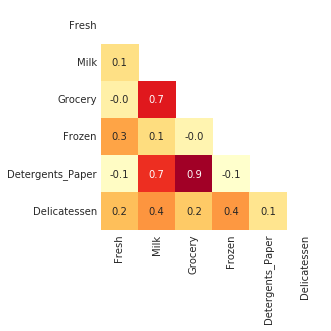

In [9]:
display( data.corr())
import matplotlib.pyplot as plt

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr,  mask=mask, annot=True, fmt='.1f', cmap='YlOrRd', square=True, cbar=False)


### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

The scatter plots show that for most features, the data distribution is skewed right, with the largest numbers of data points lying in the lowest band, closer to 0. This skew is also borne out by the relationship between the mean and 50th percentile values, with the 50th percentile values being lower than the mean for all the features. This denotes that there are a larger number of outliers on the higher side of the data. This skew is well evident in the sns distplots as well.

High degree of correlation (0.9) is exhibited between the __*Grocery and Detergents-Paper*__ features as is denoted by the heatmap of the ```corr``` feature. The __*Milk*__ feature also shows some correlation with **Grocery and Detergents-Paper** features respectively, but those are relatively scattered ones as denoted both by the scatterplot as well as the lower value (0.7).

My initial predictions were that the Fresh, Frozen and Delicatessen features are not correlated to any others, and must be a part of the training set. This is borne out by the low corr values of each of these features with the remaining features.

The surprise factor here is that Grocery that had a large R^2 value of ~0.68, thus 'well correlated' with others seems to be strongly correlated with Milk and Detergents-Paper categories the most, but not with others. So the original statement 'Everybody buys Groceries' does not seem to hold true anymore.


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

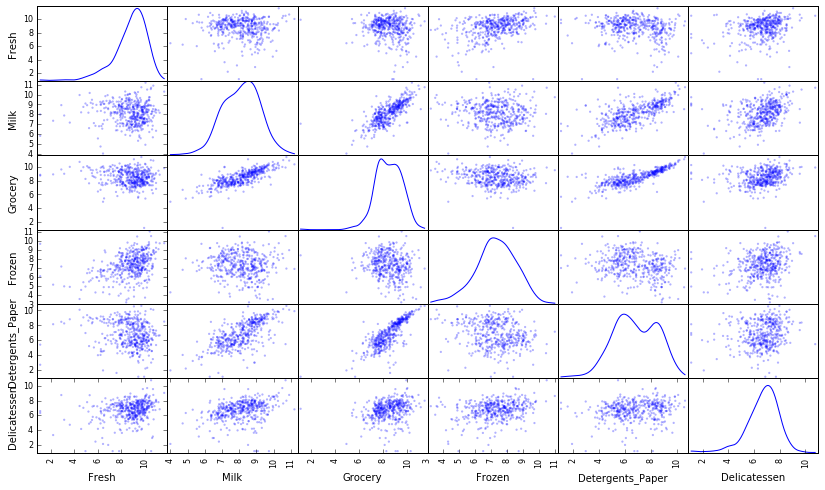

In [10]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

Notes: The Grocery to Detergents-Paper association seems to be stronger now, and Grocery to Milk which is somewhat scattered in the earlier scatter plot, is now a bit more 'focussed' or stronger.

In [11]:
# Display the log-transformed sample data
display(samples)
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1725,3651,12822,824,4424,2157
1,11072,5989,5615,8321,955,2137
2,759,18664,1660,6114,536,4100


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7.452982,8.202756,9.458918,6.714171,8.394800,7.676474
1,9.312175,8.697680,8.633197,9.026538,6.861711,7.667158
2,6.632002,9.834352,7.414573,8.718337,6.284134,8.318742


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [12]:
#Store the outlier rows in an array
outlier_rows = np.array([], dtype='int64')
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    # select the outlier points using the formula provided
    outlier_points = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    # Append the indexes of the rows to an array
    outlier_rows = np.append(outlier_rows, outlier_points.index.values.astype('int64'))
    # print outlier_rows
    # Display the outliers
    #print "\nData points considered outliers for the feature '{}':".format(feature)
    #display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
#print "outlier_rows", len(outlier_rows)
uniqs, counts = np.unique(outlier_rows, return_counts=True)
#print "uniqs", uniqs
#print "counts", counts
#print "zipper", zip(uniqs, counts)

# OPTIONAL: Select the indices for data points you wish to remove
outliers  = uniqs[counts>1]
print outliers
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

[ 65  66  75 128 154]


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

About 42 points show up as outliers in the dataset based on Tukeys method. However, most of these are outliers in a single feature out of 6. It makes no sense to discard all these observations, because values corresponding to other features could well be within usable range. 

We also notice that some obsrvations have an outlier in more than one features, and these seem to be good candidates for elimination.

Counting such data, we are left with 5 indices from the original data-set that need to be removed.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

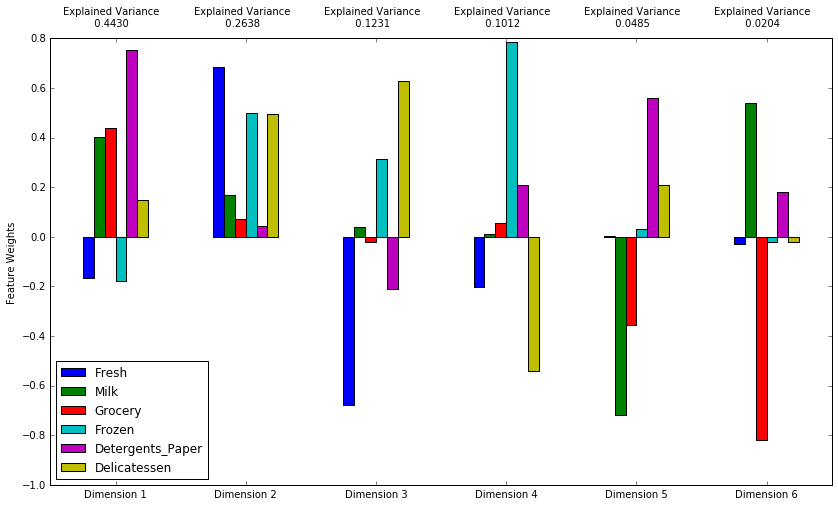

In [13]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(good_data.columns))
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

* How much variance in the data is explained* **in total** *by the first and second principal component? 
        0.4430 + 0.2638 = 0.7068 Thus ~70.7% variance is expalined in total by the 1st and 2nd PC's.
    
* How much variance in the data is explained by the first four principal components? 
        0.4430 + 0.2638 + 0.1231 + 0.1012 = 0.9311 First 4 PC's account for 93.1% variance
        
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

1. Based on the graph, we see the First PC heavily influenced by Detergents_Paper, followed by Grocery and Milk in nearly equal weights. 
        Purchases of Grocery, Milk and Detergents are correlated. If one increases, the other two will as well. Customers with spends in this component would represent something like a convenience store.

2. The Second PC shows a heavy dependency on the Fresh, immediately folowed by Frozen and Delicatessen categories, which had a low influence in the first PC. 
        This bunch of customers would be something like a regular restaurant serving foods prepared using both Fresh and Frozen ingredients.

3. The Third PC is dependent on Delicatessen and Frozen, and very low on Fresh. 
        This could represent customers like a niche/themed sandwich and coffee store.

4. The Fourth PC is high on Frozen, and somewhat on Detergents_Paper with a tiny bit of Grocery. 
        This seems to denote some sort of a fast-food or icecream outlet.


**References:** 
* https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/
* http://webspace.ship.edu/pgmarr/Geo441/Lectures/Lec%2017%20-%20Principal%20Component%20Analysis.pdf
* https://onlinecourses.science.psu.edu/stat505/node/54

**To Discuss**:<span style="color:red"> How does one explain the large negative numbers seen in these components?</span>

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [14]:
#display(samples)
#display(log_samples)
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.1425,-0.5705,0.9605,-0.3527,0.6641,-0.4568
1,0.1026,1.8169,0.7844,0.7278,-0.1747,0.1070
2,0.1924,0.2255,3.1041,0.5055,-0.7624,1.6872


<span style="color:red">What to do with this now?</span>

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

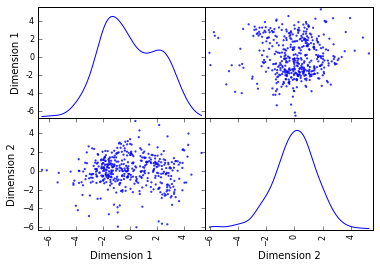

In [15]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])


# Lets see how this would look in a scatter matrix
pd.plotting.scatter_matrix(reduced_data, alpha = 0.8, diagonal = 'kde');

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [16]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.1425,-0.5705
1,0.1026,1.8169
2,0.1924,0.2255


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

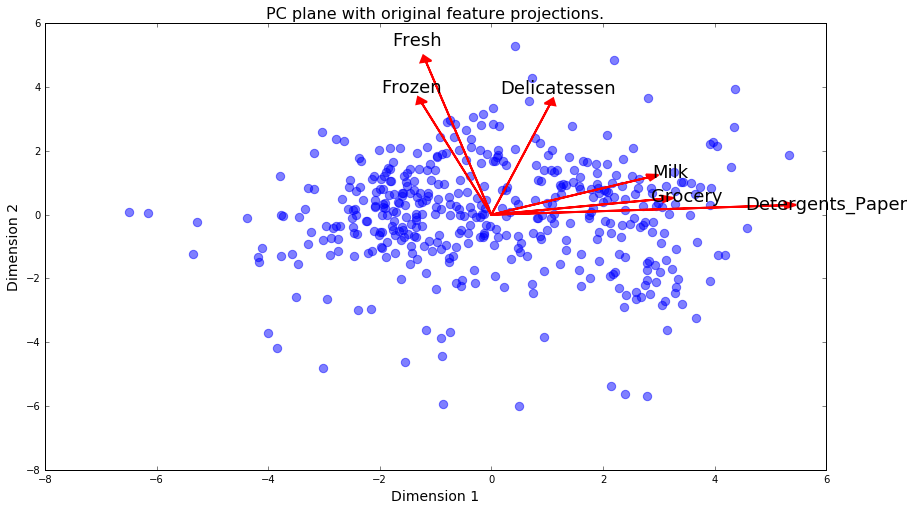

In [17]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Notes:**
1st PC: Detergents_Paper, Milk and Grocery
2nd PC: Fresh, Frozen and Delicatessen
Yes, these agree with the earlier PCA Results plot.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.


**Answer:**

K-means clustering is simple, easy to understand and apply, and converges quickly. It is computationally faster than several other  EM algorithms even with a large number of variables. K-means clustering is robust to initial conditions, and always reaches a single partition set, for given parameters.

An advantage of GMM is its capability of incorporating the covariance between the points into the model to identify more complex clusters. It computes the probability that a point belongs to a given cluster, and revises it during each iteration. This causes the algorithm to be more flexible when assigning points to a cluster and capable of performing well on in less clearly defined datasets. The result is not stable, and will vary by initial conditions as it is exploratory and sensitive to violations of distributional assumptions (symmetrical shapes in the distribution).

 We will go with K-means as it's listed as the goto general purpose algorithm.

Note: The scatter plot of the 2-component PCA shows good gaussian distribution, so GMM is not unthinkable at this point, since the symmetrical distribution requirements are not being violated.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def score_clusters(clust_num):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=clust_num, random_state=42)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    return score

for cl in [6, 5, 4, 3, 2]:
    print "\t", cl,"{:.4f}".format(score_clusters(cl))

clusterer = KMeans(n_clusters=2, random_state=42)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds)

	6 0.3659
	5 0.3500
	4 0.3318
	3 0.3969
	2 0.4263


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

	2 0.4263
	3 0.3969
	4 0.3318
	5 0.3500
	6 0.3659

As is evident, best silhoutte score belongs to the 2-cluster scenario.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

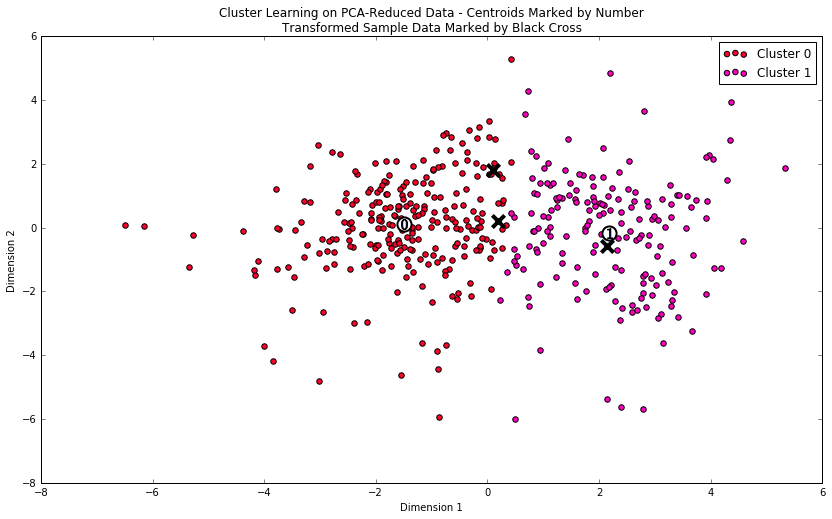

In [20]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [21]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
#display(true_centers)

#print true_centers,"\n...\n"
#display(np.transpose(np.exp(good_data.mean())))
#print type(np.transpose(np.exp(good_data.mean())))
pd.options.display.float_format = '{:,.1f}'.format
means = pd.DataFrame(index=["means-mea"], columns=data.mean())
#print type(means)
#print means.shape
print means
#display(np.transpose(means))
#true_centers.append(means)
display(true_centers)

          12,000.3 5,796.3  7,951.3  3,071.9  2,881.5  1,524.9 
means-mea      NaN      NaN      NaN      NaN      NaN      NaN


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,"8,867.0","1,897.0","2,477.0","2,088.0",294.0,681.0
Segment 1,"4,005.0","7,900.0","12,104.0",952.0,"4,561.0","1,036.0"


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

 customer assigned to Cluster 0 would most likely represent some type of market/covinience store. This can be concluded based on their consistent purchase costs across the Milk, Grocery and Frozen product categories and higher than average purchase costs of Fresh.
 
On the other hand, a customer assigned to Cluster 1 most likely represents some type of restaurant or middleman supplier as they have higher than or close to average purchase costs of Groceries and Milk and Detergent_paper


### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [22]:
display(samples)
display (data.mean())
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1725,3651,12822,824,4424,2157
1,11072,5989,5615,8321,955,2137
2,759,18664,1660,6114,536,4100


Fresh              12,000.3
Milk                5,796.3
Grocery             7,951.3
Frozen              3,071.9
Detergents_Paper    2,881.5
Delicatessen        1,524.9
dtype: float64

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**

<table>
<thead style="font-size: 18px"><tr><th style="text-align: center">Sample No.</th><th style="text-align: center">Original Guess</th><th style="text-align: center">PCA driven guess</th><th style="text-align: center">Matching?</th></tr></thead>

<tbody>

    <tr><td style="text-align: left; vertical-align: top; font-size: 14px">1</td><td style="text-align: left; vertical-align: top;"> middleman supplier to restaurants, superstores and mom-n-pop stores</td><td style="text-align: left; vertical-align: top;">PCA Guess in Cluster 1, restaurant or middleman supplier</td><td>Yes</td></tr>
    
    <tr><td style="text-align: left; vertical-align: top; font-size: 14px">2</td><td style="text-align: left; vertical-align: top;">fast-food chain, a set of food-trucks, or a niche eatery</td><td style="text-align: left; vertical-align: top;">PCA Guess in cluster 0, supermarket or convenience store</td><td>No</td></tr>

<tr><td style="text-align: left; vertical-align: top; font-size: 14px">3</td><td style="text-align: left; vertical-align: top;">Coffee shop</td><td style="text-align: left; vertical-align: top;">PCA Guess in cluster 0, supermarket or convenience store</td><td>Yes</td></tr>

</tbody>
</table>


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

An implicit assumption is that the changes _will_ affect all customers _of the same category_ equally. This may not really be valid, since different establishments may have different schedules related to stocking and usages.

I believe customers in Cluster 0 will benefit from a 5-day delivery schedule while customers in Cluster 1 will be served better by 3-day schedule. This is because purchasers of Fresh would be better served by more frequent deliveries, while Grocery, Milk and Detergents_Paper have longer shelf life and can sustain longer delivery cycles.

However those are guesses, and must be tested using an effective A/B testing program to statistically assess the impact of the delievery service changes on the differing customer segments. 

Testing on a small sample of **_both_** segments and incorporating the feedback received would be a good way to assess the market.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

As we have noticed above in this exercise, 93% of the data is explained by two (2) customer segments (Two K-means). We can thus use this same function to identify in which on e of the two classes the ten new customers fall in, and based on the result, offer a 5-day or 3-day delivery schedules.

The cluster that we assign them to is now a feature, which could be used as an input when predicting other labels like what sort of customer they are or how much of a given category they're likely to purchase.


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

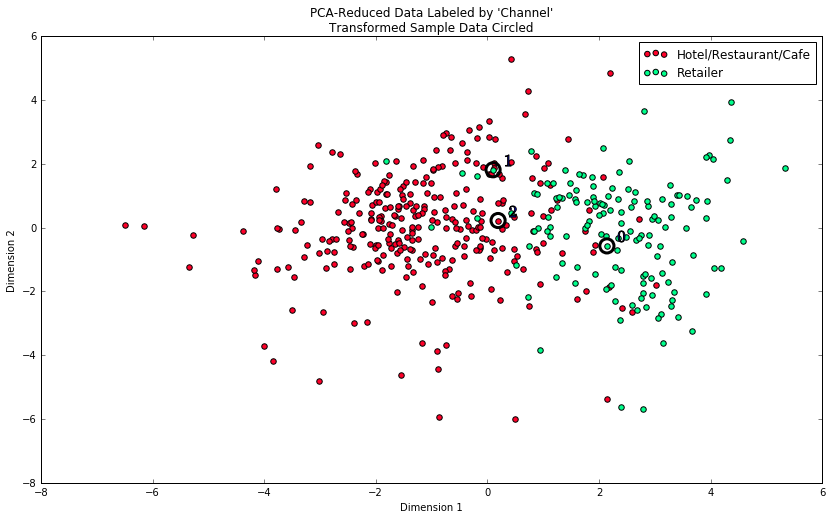

In [23]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

Since I have used the K-means clustering, with 2 clusters, the prediction distribution does not significantly differ from the underlying distribution.

We see from the above diagram that there is a significant amount of overlap that occur between the two segments, and it would be instructive to further check if a 3-way clustering may be able to identify better boundaries.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.